**1. Setup Lingkungan Kerja di Google Colab**

In [ ]:
# Import libraries untuk analisis data dan preprocessing
import numpy as np                      # untuk komputasi numerik
import pandas as pd                     # untuk manipulasi data
import matplotlib.pyplot as plt          # untuk visualisasi data
import seaborn as sns                   # untuk visualisasi data yang lebih baik
from sklearn.preprocessing import MinMaxScaler  # untuk normalisasi data

# Import library untuk deep learning dan model LSTM
import tensorflow as tf                  # untuk menggunakan TensorFlow dan Keras
from tensorflow.keras.models import Sequential  # untuk membuat model sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout  # untuk membuat layer LSTM dan Dense
from tensorflow.keras.optimizers import Adam  # untuk optimizer Adam
from tensorflow.keras.callbacks import EarlyStopping  # untuk menghentikan training lebih awal jika overfitting


**2. Import Dataset**

In [ ]:
# Membaca dataset menggunakan pandas
import pandas as pd

# Memastikan file yang diunggah ada di direktori yang tepat
df = pd.read_csv('NFLX.csv')

# Menampilkan beberapa baris pertama dari dataset untuk memverifikasi
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**3. Eksplorasi Data (Exploratory Data Analysis)**
- Tujuan: Memahami karakteristik dataset sebelum membangun model.

Aktivitas:
- Lihat beberapa baris pertama dataset untuk memahami isinya.
- Tampilkan informasi dataset seperti jumlah baris, tipe data, dan jumlah fitur.
- Visualisasikan data dengan grafik seperti:
- Plot Harga Saham berdasarkan kolom Close (harga penutupan).
- Visualisasi pola tren dari waktu ke waktu menggunakan kolom Date.
- Histogram Volume untuk melihat distribusi transaksi saham.


In [ ]:
# Menampilkan 5 baris pertama dari dataset
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
# Menampilkan informasi dataset: jumlah baris, kolom, dan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# Menampilkan jumlah nilai yang hilang (missing values) di setiap kolom
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


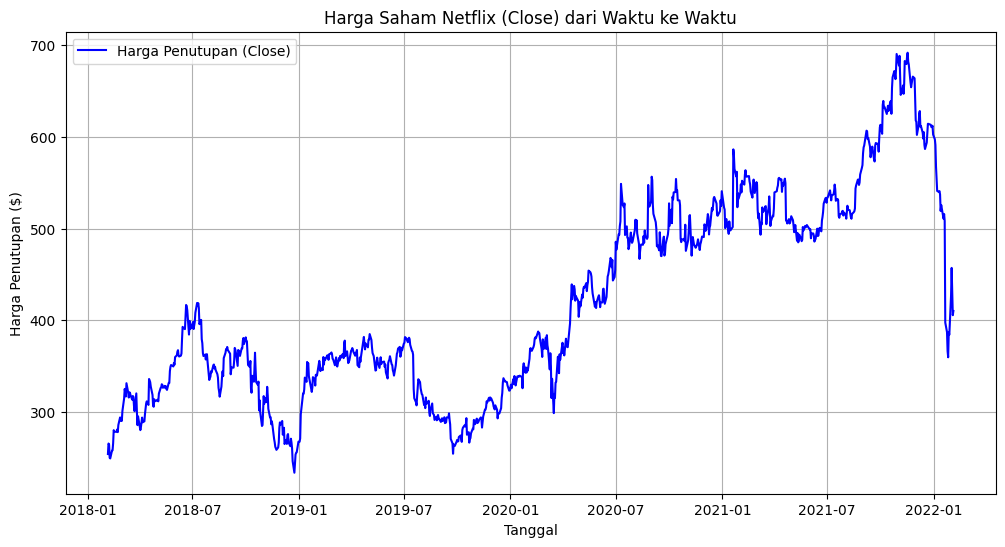

In [ ]:
# Mengonversi kolom Date menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot harga saham berdasarkan kolom 'Close'
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Harga Penutupan (Close)', color='b')
plt.title('Harga Saham Netflix (Close) dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan ($)')
plt.legend()
plt.grid(True)
plt.show()

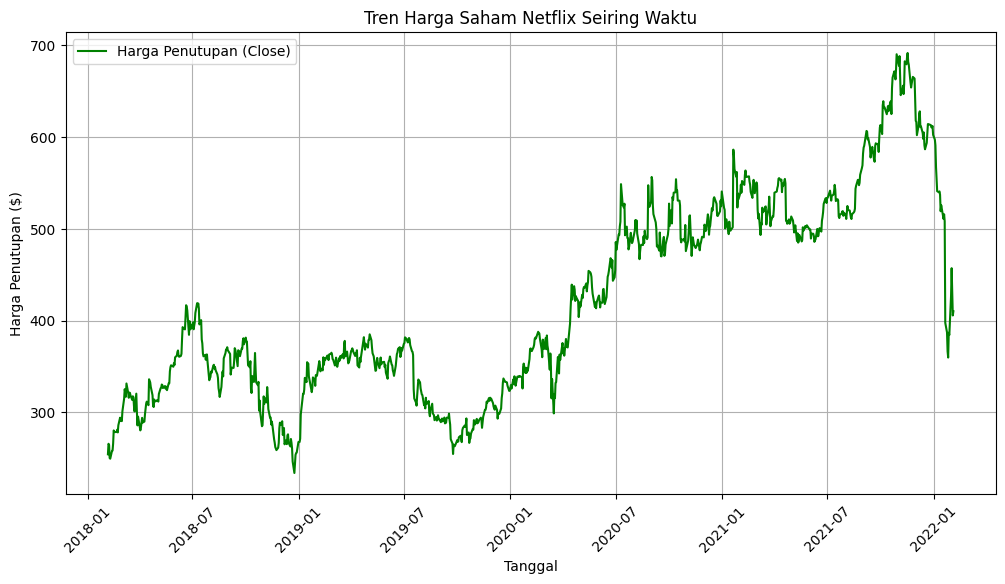

In [ ]:
# Plot harga saham berdasarkan kolom 'Date' dan 'Close'
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Harga Penutupan (Close)', color='g')
plt.title('Tren Harga Saham Netflix Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Menyesuaikan rotasi label tanggal
plt.show()

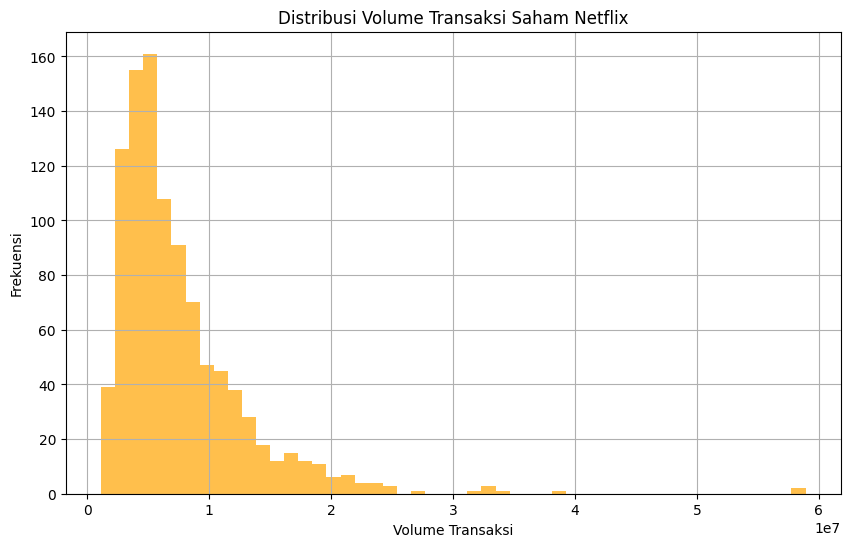

In [ ]:
# Plot histogram Volume untuk melihat distribusi transaksi saham
plt.figure(figsize=(10,6))
plt.hist(df['Volume'], bins=50, color='orange', alpha=0.7)
plt.title('Distribusi Volume Transaksi Saham Netflix')
plt.xlabel('Volume Transaksi')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**Mengidentifikasi Outlier**

Cek apakah ada outlier yang signifikan di kolom Close atau Volume. Outlier yang tidak biasa dapat mempengaruhi model Anda, jadi penting untuk memeriksa apakah perlu menangani outlier.

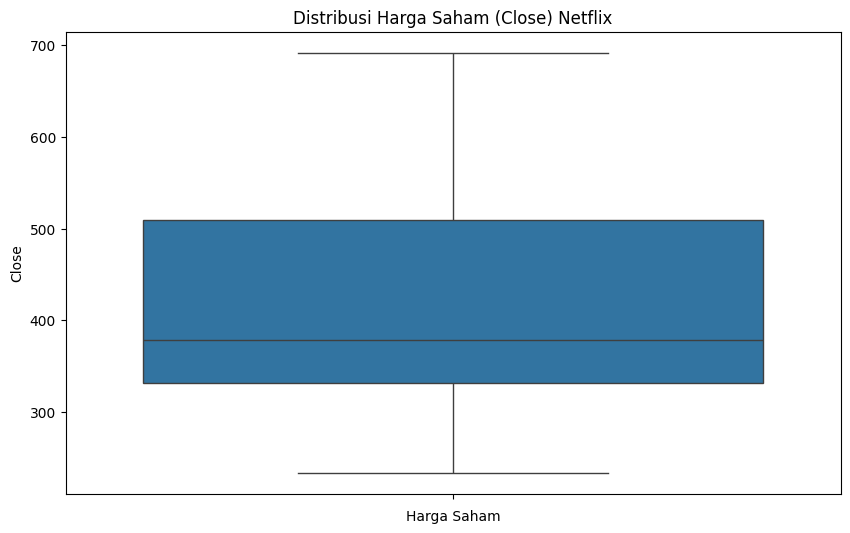

In [ ]:
# Boxplot untuk kolom Close
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Close'])
plt.title('Distribusi Harga Saham (Close) Netflix')
plt.xlabel('Harga Saham')
plt.show()


**3. Analisis Korelasi antar Fitur**

Untuk memahami hubungan antara fitur-fitur seperti Open, High, Low, Close, dan Volume, Anda dapat melakukan analisis korelasi.
Korelasi dapat memberikan wawasan apakah fitur tertentu berhubungan kuat dengan harga saham atau tidak.

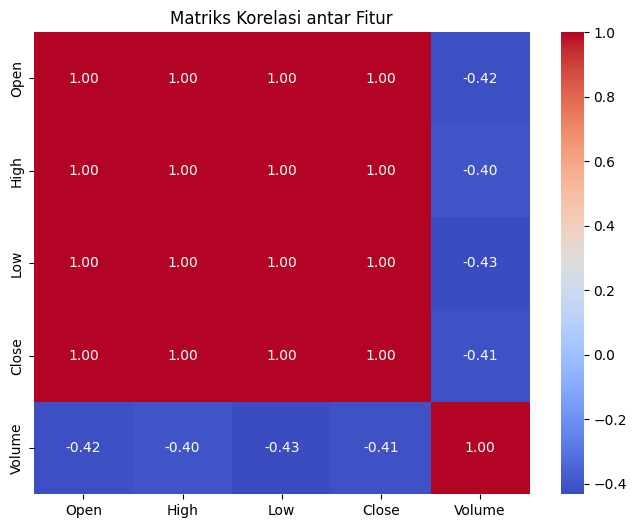

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antar Fitur')
plt.show()


**4. Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Konversi Tanggal dan Jadikan Index
df['Date'] = pd.to_datetime(df['Date'])  # Mengubah kolom Date menjadi datetime
df.set_index('Date', inplace=True)  # Menetapkan kolom Date sebagai index

# 2. Pilih Fitur Utama (Close sebagai target)
close_prices = df[['Close']]  # Pilih hanya kolom Close sebagai target prediksi

# 3. Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)  # Normalisasi data harga saham

# 4. Buat Data Time-Series (Sliding Window)
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])  # Ambil 10 hari terakhir (time_step) sebagai fitur
        y.append(data[i + time_step, 0])  # Prediksi harga saham di hari ke-11
    return np.array(X), np.array(y)

# Membuat dataset dengan sliding window 10 hari
X, y = create_dataset(scaled_close, time_step=10)

# Reshape X untuk dimasukkan ke dalam LSTM (samples, time_step, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Menampilkan bentuk data setelah preprocessing
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (999, 10, 1)
Shape of y: (999,)


**5. Membagi Data menjadi Train dan Test Set**

In [ ]:
# Tentukan ukuran data train dan test
train_size = int(len(X) * 0.8)  # 80% untuk training
test_size = len(X) - train_size  # 20% untuk testing

# Membagi data menjadi train dan test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Menampilkan bentuk data setelah pembagian
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (799, 10, 1)
Shape of X_test: (200, 10, 1)
Shape of y_train: (799,)
Shape of y_test: (200,)


**6. Membangun Model LSTM**

Tujuan: Membuat model LSTM untuk memprediksi harga saham.

Aktivitas:

Tentukan jumlah neurons dan layer LSTM.

Struktur model yang sederhana bisa seperti ini:

Input Layer: Layer untuk menerima data input (lag features).

LSTM Layer: Untuk menangani urutan data time-series.

Dense Layer: Untuk memprediksi harga saham sebagai
output.

Kompilasi Model:
Tentukan loss function: gunakan Mean Squared Error (MSE) karena ini adalah masalah regresi.

Optimizer: gunakan Adam untuk mempercepat proses training.

In [ ]:
import numpy as np

# Fungsi untuk membuat dataset time-series dengan sliding window
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        # X adalah window data selama time_step hari
        X.append(data[i:i + time_step, 0])  # Ambil harga penutupan Close
        y.append(data[i + time_step, 0])    # Harga pada hari berikutnya
    return np.array(X), np.array(y)

# Menggunakan data Close yang telah dinormalisasi
data = df['Close'].values.reshape(-1, 1)  # Pastikan data dalam bentuk 2D (samples, 1)

# Menggunakan fungsi untuk membuat dataset dengan time_step = 60
X, y = create_dataset(data, time_step=60)

# Reshape X menjadi bentuk (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Menampilkan bentuk data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (949, 60, 1)
Shape of y: (949,)


**7. Training Model**

Tujuan: Melatih model LSTM menggunakan data training.
Aktivitas:
Tentukan jumlah epoch (misalnya 50–100) dan batch size (misalnya 32).
Selama proses training:
Pantau loss function untuk melihat seberapa baik model belajar.
Jika loss tidak turun, bisa jadi model butuh tuning parameter.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0436 - val_loss: 0.0222
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016 - val_l

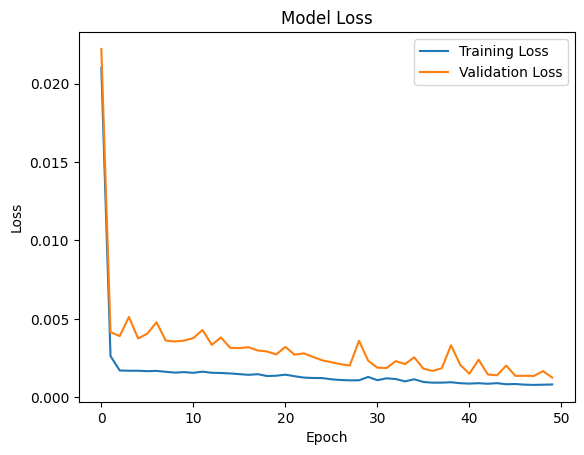

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Membuat model LSTM
model = Sequential()

# Menambahkan layer LSTM pertama
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Menambahkan layer Dense untuk output
model.add(Dense(units=1))

# Mengkompilasi model dengan optimizer Adam dan loss MSE
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Menampilkan hasil training (Loss function)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**8. Model Evaluation**

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Mean Squared Error (MSE): 0.0012591343690150176
Root Mean Squared Error (RMSE): 0.03548428340850379


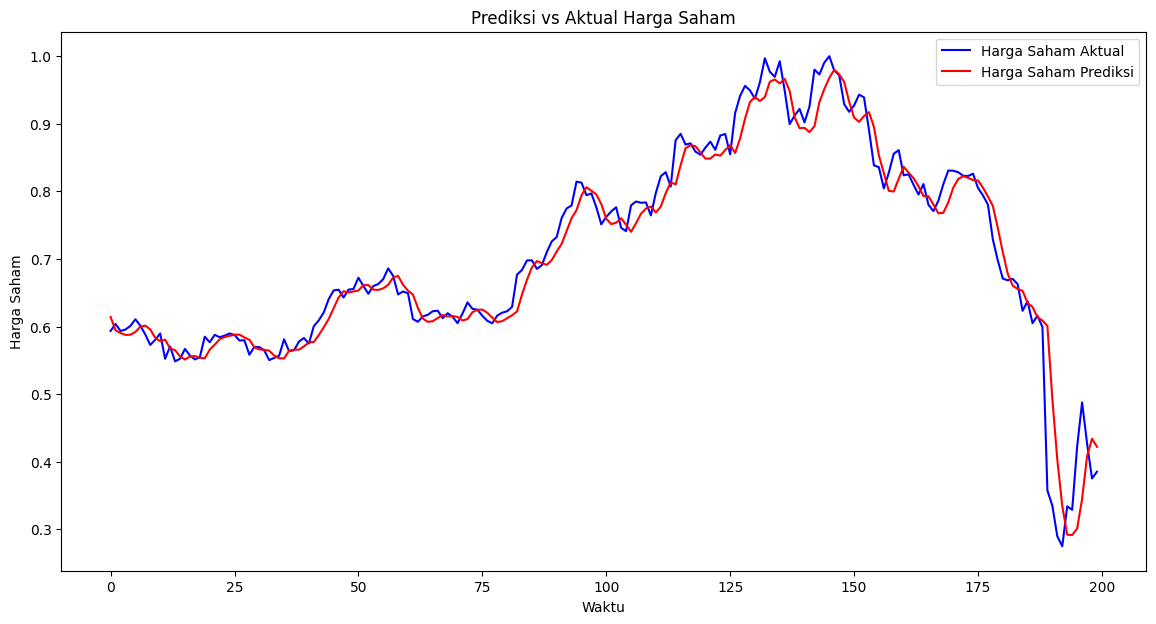

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan model untuk prediksi harga saham pada data test
predicted_stock_price = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_stock_price)
print("Mean Squared Error (MSE):", mse)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualisasi Hasil Prediksi vs Data Aktual
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Harga Saham Aktual')
plt.plot(predicted_stock_price, color='red', label='Harga Saham Prediksi')
plt.title('Prediksi vs Aktual Harga Saham')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.show()


**9. Visualisasi dan Interpretasi Hasil**
Tujuan: Menyajikan hasil model dengan visualisasi yang mudah dipahami.
Aktivitas:
Buat grafik:
Line Chart: Menampilkan tren harga saham aktual vs prediksi.
Error Chart: Menunjukkan error antara prediksi dan data asli.
Interpretasikan hasil:
Apakah model menangkap tren dengan baik?
Bagaimana performa model pada data training vs testing?


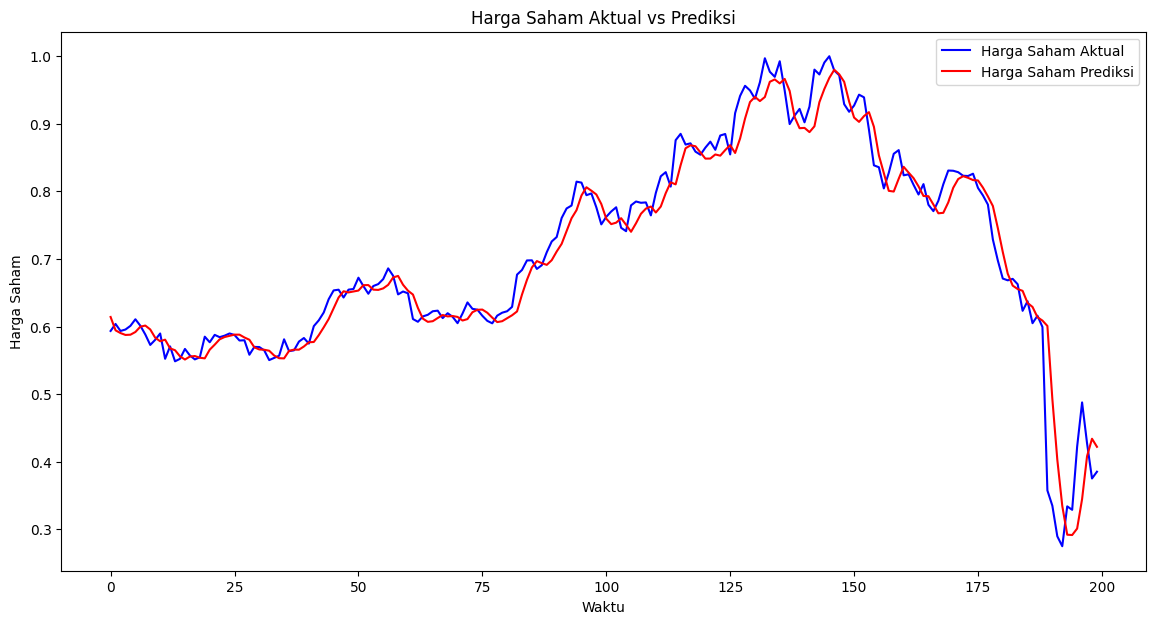

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi Line Chart: Harga Saham Aktual vs Prediksi
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Harga Saham Aktual')
plt.plot(predicted_stock_price, color='red', label='Harga Saham Prediksi')
plt.title('Harga Saham Aktual vs Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.show()




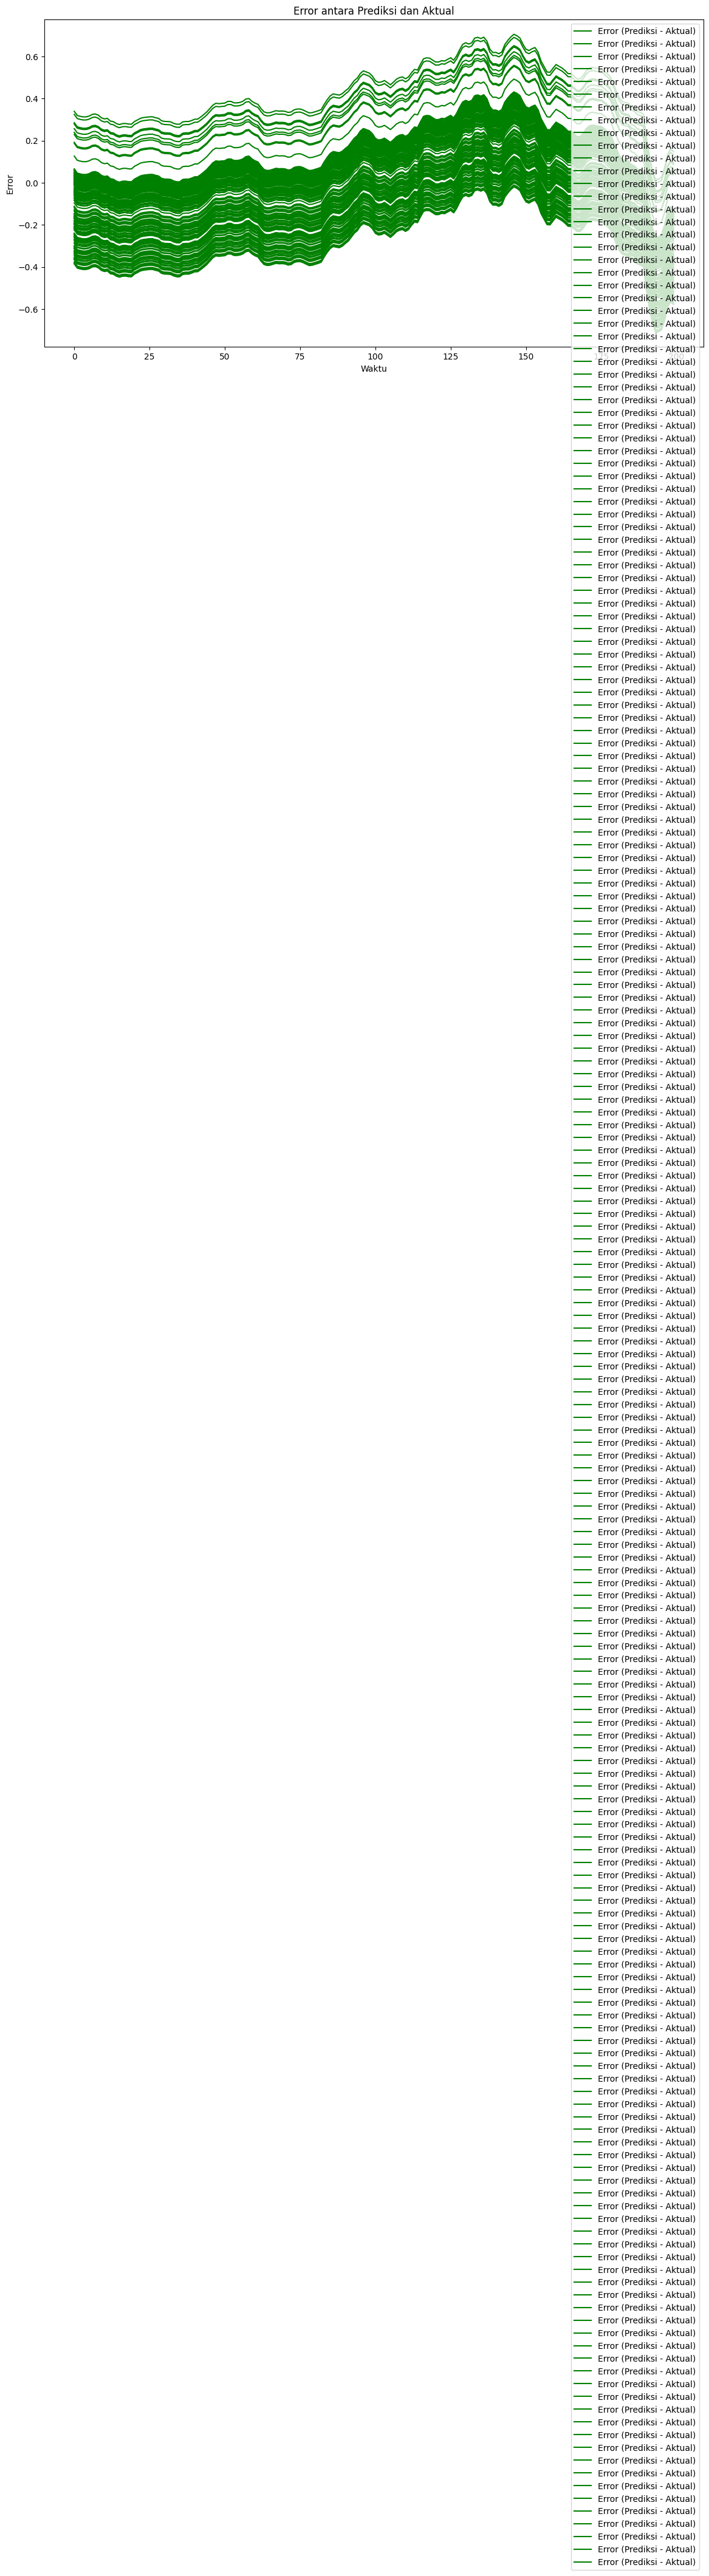

In [ ]:
# Visualisasi Error Chart: Error antara Prediksi dan Aktual
error = predicted_stock_price - y_test
plt.figure(figsize=(14, 7))
plt.plot(error, color='green', label='Error (Prediksi - Aktual)')
plt.title('Error antara Prediksi dan Aktual')
plt.xlabel('Waktu')
plt.ylabel('Error')
plt.legend()
plt.show()



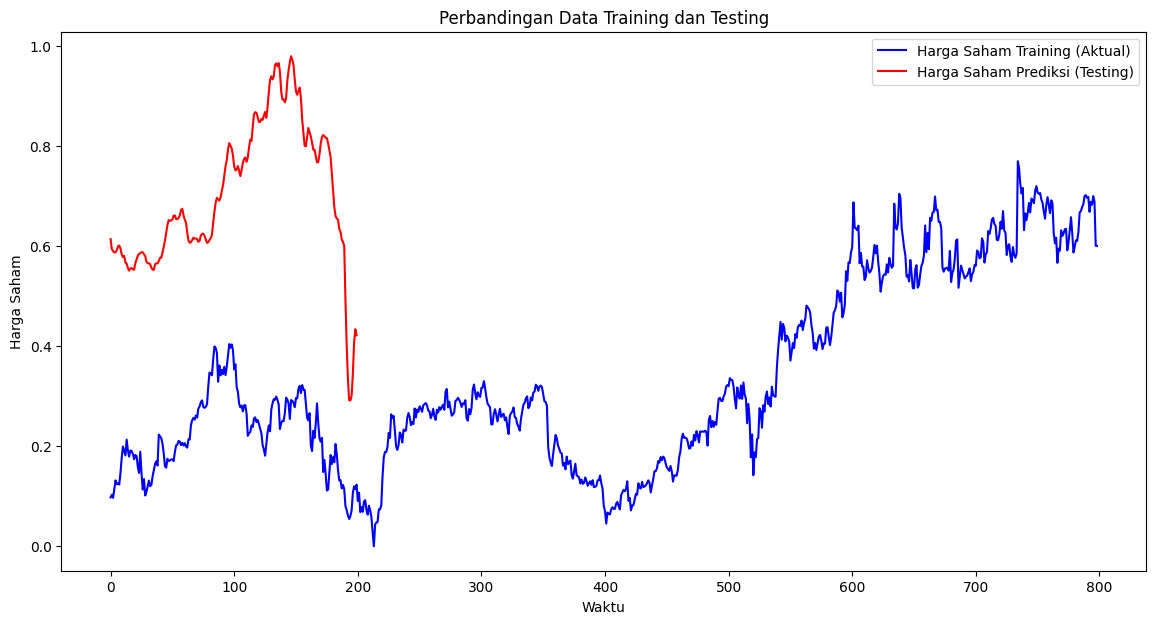

In [ ]:
# Visualisasi untuk Perbandingan Data Training dan Testing
plt.figure(figsize=(14, 7))
# Untuk data training
plt.plot(np.arange(len(y_train)), y_train, color='blue', label='Harga Saham Training (Aktual)')
plt.plot(np.arange(len(predicted_stock_price)), predicted_stock_price, color='red', label='Harga Saham Prediksi (Testing)')
plt.title('Perbandingan Data Training dan Testing')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.show()